# Cuisine Preditions using MultiClass Classification

## The Begining: web-scrapping

Lastly, saving the dataframe into a csv:
full_database.to_csv('full_database.csv')

## Import DataFrame, EDA and Data Cleaning

In [1]:
import pandas as pd
df = pd.read_csv('full_database.csv')
df.head()
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)

In [2]:
df.head()

,cuisine,recipe_ingredients,recipe_name
0,african,2 tbsp vegetable oil ½ tsp cumin seeds ½ tsp f...,Bunny chow
1,african,"1 tbsp olive or vegetable oil 2 large onions, ...",Jollof rice with fried plantains
2,african,400ml/14fl oz passata 3 tbsp tomato purée 2 fr...,Jollof rice
3,african,4g smoked paprika 2g cayenne pepper 6g ginger...,Suya fillet burger with sweet potato cubes and...
4,african,300g/10½oz basmati rice 1 tbsp vegetable oil 8...,Jollof rice with chicken


In [3]:
df.cuisine.value_counts()

cuisine
greek                         166
thai_and_south-east_asian     158
irish                         149
american                      147
indian                        146
french                        139
japanese                      137
african                       127
korean                        118
italian                       105
mexican                       103
chinese                        74
british                        67
turkish_and_middle_eastern     64
east_european                  24
caribbean                      24
nordic                         24
pakistani                      24
spanish                        24
south_american                 18
portuguese                     15
Name: count, dtype: int64

In [4]:
df = df.groupby('cuisine').filter(lambda x: len(x) >= 50)

In [6]:
df.to_csv('final_database.csv')

## Checking for Class Imbalance

<Axes: xlabel='cuisine'>

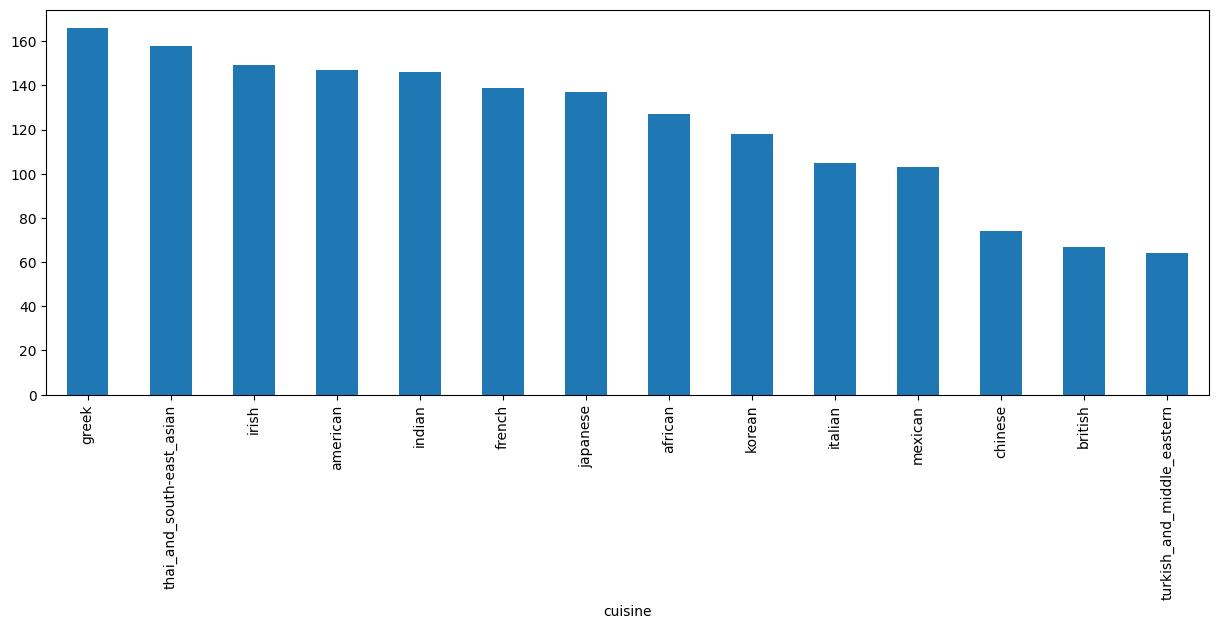

In [7]:
df['cuisine'].value_counts().plot(kind='bar', figsize=(15,5))

## Creating Word Clouds For Each Class

In [8]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
cuisines = set(df.cuisine.tolist())
ntlk_stopwords = stopwords.words('english')+list(string.punctuation)
stopwords = ntlk_stopwords+['1','2','3','4','5','6','7','8','9', 'tsp','tbsp',
             'tablespoon', 'teaspoon', 'tablespoons', 'teaspoons',
             'large', 'cup', 'ounces', 'pound', 'oz', 'slice','sliced',
             'cup', 'cups', 'ounce', 'ounces', 'chopped', 'finely', 'cut',
            'thinly']


for cuisine in cuisines:
    all_words = []
    for recipe in df[df.cuisine == cuisine].recipe_ingredients.tolist():
        words = recipe.split()
        all_words += words
    text = ' '.join([w.lower() for w in all_words if w not in stopwords])
    wordcloud = WordCloud(max_font_size=50, max_words=100).generate(text)
    plt.figure(figsize=(10,5))
    plt.title(cuisine)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Feature Engineering

### Count Vectors

### TF-IDF Vectors as Features

### Word Level

### N-Gram Level¶

In [12]:
all_words = []
for recipe in df[df.cuisine == "chinese"].recipe_ingredients.tolist():
    words = recipe.split()
    all_words += words
text = ' '.join([w.lower().replace(',','') for w in all_words if w not in stopwords])


In [15]:
nltk.download('punkt')
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

token = nltk.word_tokenize(text)
bigrams = ngrams(token,2)
trigrams = ngrams(token,3)
fourgrams = ngrams(token,4)
fivegrams = ngrams(token,5)

print(Counter(bigrams))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Counter({('soy', 'sauce'): 64, ('sesame', 'oil'): 35, ('vegetable', 'oil'): 29, ('rice', 'wine'): 23, ('dry', 'sherry'): 23, ('light', 'soy'): 22, ('wine', 'dry'): 22, ('(', 'optional'): 21, ('optional', ')'): 20, ('freshly', 'ground'): 19, ('(', 'about'): 19, ('garlic', 'cloves'): 17, ('black', 'pepper'): 17, ('fresh', 'ginger'): 16, ('shaoxing', 'rice'): 15, ('toasted', 'sesame'): 15, ('kosher', 'salt'): 15, ('spring', 'onions'): 14, ('ground', 'black'): 14, ('groundnut', 'oil'): 13, ('white', 'pepper'): 12, ('fresh', 'root'): 12, ('root', 'ginger'): 12, ('rice', 'vinegar'): 11, ('ground', 'white'): 10, ('grated', 'fresh'): 10, ('red', 'pepper'): 9, ('spring', 'onion'): 9, ('sauce', '('): 9, ('peanut', 'vegetable'): 9, ('(', 'for'): 9, ('egg', 'noodles'): 8, ('dark', 'soy'): 8, ('sesame', 'seeds'): 8, ('ginger', 'peeled'): 8, ('oil', '('): 8, ('(', 'or'): 8, ('skinless', 'chicken'): 8, ('hoisin', 'sauce'): 8, ('minced', 'fresh'): 8, ('cups', ')'): 8, ('oyster', 'sauce'): 7, ('chicken

# Model Building

Import Necessary Libararies

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import nltk
from nltk.corpus import stopwords
import string
import re
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import time
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import svm
import seaborn as sns
np.random.seed(0)

In [17]:
df = pd.read_csv('final_database.csv')
df = df.drop(df.columns[0], axis=1)
df.head()

,cuisine,recipe_ingredients,recipe_name
0,african,2 tbsp vegetable oil ½ tsp cumin seeds ½ tsp f...,Bunny chow
1,african,"1 tbsp olive or vegetable oil 2 large onions, ...",Jollof rice with fried plantains
2,african,400ml/14fl oz passata 3 tbsp tomato purée 2 fr...,Jollof rice
3,african,4g smoked paprika 2g cayenne pepper 6g ginger...,Suya fillet burger with sweet potato cubes and...
4,african,300g/10½oz basmati rice 1 tbsp vegetable oil 8...,Jollof rice with chicken


##### Some more data cleaning

In [18]:
ingredients = df['recipe_ingredients'].tolist()
cuisine = df['cuisine'].tolist()
stopwords_list = stopwords.words('english')+ list(string.punctuation)
stopwords_list+= ["''", '""', '...', '``']
stopwords_list+= ['tsp','tbsp',
             'tablespoon', 'teaspoon', 'tablespoons', 'teaspoons',
             'large', 'cup', 'ounces', 'pound', 'oz', 'slice','sliced',
             'cup', 'cups', 'ounce', 'ounces', 'chopped', 'finely', 'cut',
            'thinly', 'pounds', 'lb', 'lbs', 'g','oz', 'small', 'large']

#This function returns a PARAGRAPH of words that have stopwords and numbers removed
def process_recipe(recipe):
    tokens = nltk.word_tokenize(recipe)
    stopwords_removed = ' '.join([token.lower() for token in tokens if token not in stopwords_list])
    pattern= r"[a-z]+"
    regex_tokens = re.findall(pattern, stopwords_removed)
    return ' '.join(regex_tokens)

In [19]:
processed_ingredients = list(map(process_recipe, ingredients))
processed_ingredients

['vegetable oil cumin seeds fennel seeds cm in piece cinnamon stick green cardamom pods star anise bay leaf onion south african curry powder tomatoes kg lb oz boneless leg lamb cm in dices fresh ginger garlic curry leaves potatoes cubes size meat salt coriander leaves lime juice loaves crusty white bread unsliced across half middle crumbs removed coriander cress sprigs garnish',
 'olive vegetable oil onions x g oz cans plum tomatoes red pepper diced tomato pur e cayenne pepper chilli powder curry powder bay leaf sprig fresh thyme stock cube g oz long grain basmati rice salt freshly ground black pepper plantains slices deep fried green leaf salad',
 'ml fl passata tomato pur e fresh red scotch bonnet chillies seeds removed onions red peppers seeds removed roughly garlic cloves peeled fresh rosemary leaves fresh thyme leaves ground coriander sweet smoked paprika ml fl olive oil g oz cherry tomatoes halved ml pints chicken stock vegetable stock bay leaves g lb oz long grain rice rinsed su

In [20]:
ingredients_df = pd.DataFrame(processed_ingredients)
cuisines_df = pd.DataFrame(cuisine)
ingredients_df

,0
0,vegetable oil cumin seeds fennel seeds cm in p...
1,olive vegetable oil onions x g oz cans plum to...
2,ml fl passata tomato pur e fresh red scotch bo...
3,g smoked paprika g cayenne pepper g ginger pow...
4,g oz basmati rice vegetable oil boneless skinl...
...,...
1695,water salt plus baking soda optional bok choy ...
1696,water plus glaze walnut halves sugar peanut oil
1697,boneless beef shank vegetable oil inch piece f...
1698,ounce packages pickled mustard greens caravell...


In [21]:
model_df = pd.concat([ingredients_df, cuisines_df], axis=1, sort=False)
model_df.columns = ['ingredients','cuisine']

In [24]:
recipes = processed_ingredients
vec = CountVectorizer()
X = vec.fit_transform(recipes)
#tokenized_matrix = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
tokenized_matrix = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

In [25]:
tokenized_model = pd.concat([tokenized_matrix, cuisines_df], axis=1, sort=False)
tokenized_model = tokenized_model.rename(columns={tokenized_model.columns[-1]: "cuisine" })

Converting our target variables from string to integer

In [61]:
tokenized_model.cuisine.unique()

array(['african', 'american', 'british', 'chinese', 'french', 'greek',
       'indian', 'irish', 'italian', 'japanese', 'korean', 'mexican',
       'thai_and_south-east_asian', 'turkish_and_middle_eastern'],
      dtype=object)

In [62]:
tokenized_model.head()

,about,abuelita,aburaage,accompaniment,accompaniments,according,achiote,acid,across,acting,...,yuzupassion,za,zansh,zarame,zest,zester,ziti,zucchini,cuisine,num
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,african,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,african,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,african,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,african,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,african,1


#### Splitting the data for actual model running

In [63]:
data = tokenized_model.iloc[:,:-2]
target = tokenized_model.num
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, train_size = .8)

In [64]:
target = model_df.cuisine
data = model_df.ingredients
#tokenize the data, transform it into a tfidf dataframe, concat the target to the big dataframe
#then run vectorizer on all of the ingredients (not cuisine)
#train test split



In [65]:
def number(c):
    if c['cuisine'] == "african":
        return 1
    elif c['cuisine'] == "american":
        return 2
    elif c['cuisine'] == "british":
        return 3
    elif c['cuisine'] == "chinese":
        return 4
    elif c['cuisine'] == "french":
        return 5
    elif c['cuisine'] == "greek":
        return 6
    elif c['cuisine'] == "indian":
        return 7
    elif c['cuisine'] == "irish":
        return 8
    elif c['cuisine'] == "italian":
        return 9
    elif c['cuisine'] == "japanese":
        return 10
    elif c['cuisine'] == "korean":
        return 11
    elif c['cuisine'] == "mexican":
        return 12
    elif c['cuisine'] == "thai_and_south-east_asian":
        return 13
    elif c['cuisine'] == "turkish_and_middle_eastern":
        return 14



tokenized_model['num'] = tokenized_model.apply(number, axis=1)

## Let's Look at a Scatter Matrix

In [66]:
df['category_id'] = df['cuisine'].factorize()[0]
category_id_df = df[['cuisine', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'cuisine']].values)
conf_mat = confusion_matrix(y_test, val_preds)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.all().values, yticklabels=category_id_df.all().values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show();

NameError: name 'val_preds' is not defined

## It's modeling time!

Random Forest Model

In [67]:
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=36)
rf_classifier.fit(X_train, y_train)
rf_preds = rf_classifier.predict(X_test)
rf_train_score = accuracy_score(y_test, rf_preds)
print('Random Forest Accuracy Score is: ',rf_train_score*100,'%')

Random Forest Accuracy Score is:  64.70588235294117 %


XG-Boost Model

In [68]:
xg_clf = xgb.XGBClassifier(n_jobs=-1)
xg_clf.fit(X_train, y_train)
training_preds = xg_clf.predict(X_train)
val_preds = xg_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)
print('XG Boost Model Accuracy Score is: ', val_accuracy*100,'%')

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13], got [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]

## Now to Fine Tune the Hyper Parameters Using GridSearch CV

### GridSearch for Random Forest

Previous Results:

Testing Accuracy: 62.65%


Total Runtime for Grid Search on Random Forest Classifier: 546.6 seconds

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

In [51]:
rf_param_grid = {
    'n_estimators': [300, 500],
    'criterion': ['gini'],
    'max_depth': [None, 2],
    'min_samples_split': [10],
    'min_samples_leaf': [1]
}

In [53]:
start = time.time()
rf_grid_search =GridSearchCV(rf_classifier, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print("Testing Accuracy: {:.4}%".format(rf_grid_search.best_score_ * 100))
print("Total Runtime for Grid Search on Random Forest Classifier: {:.4} seconds".format(time.time() - start))
print("")
print("Optimal Parameters: {}".format(rf_grid_search.best_params_))

Testing Accuracy: 62.57%
Total Runtime for Grid Search on Random Forest Classifier: 26.38 seconds

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


### XG-Boost GridSearch

Previous Result:

Grid Search found the following optimal parameters:

learning_rate: 0.1

max_depth: 6

min_child_weight: 10

n_estimators: 100

subsample: 0.7


Total Runtime for Grid Search on XG Boost: 2.037e+03 seconds


Training Accuracy: 74.19%

Validation accuracy: 61.47%

In [54]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [100],
}

In [55]:
grid_clf = GridSearchCV(xg_clf, param_grid, scoring='accuracy', cv=None, n_jobs=-1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)
print("")
print("Total Runtime for Grid Search on XG Boost: {:.4} seconds".format(time.time() - start))
print("---*30")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1471, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13], got [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
